<a href="https://colab.research.google.com/github/bumbleboo021/SEASQuantumComputing-Quantum-many-body-physics/blob/main/SEASQuantumComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantum Computing Project: Neural networks for quantum many-body physics


Mentor: Nguyễn Thế Quỳnh, Huỳnh Vũ Khôi Nguyên, Trần Hữu Bình Minh

Mentee: Nguyễn Thị Linh Đan, Nguyễn Minh Đức, Nguyễn Xuân Hoàng, Nguyễn Thái Sơn, Đặng Hữu Thịnh, Đỗ Viết Hoàng Long

Video thuyết trình [SEASQuantumComputing-Video](https://www.youtube.com/watch?v=1YikVMO2c04&t=981s)

Slide [SEASQuantumComputing-Slide](https://drive.google.com/file/d/1kJr1JGNzJ2k6YBq8y-pdkvooQ0LwI9V-/view)

#1. Tải và thêm thư viện cần sử dụng

In [ ]:
!pip install --upgrade --quiet pip
!pip install --upgrade --quiet netket

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:00


In [ ]:
import netket as nk
from netket.graph import Lattice
from netket.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import json
import time
from flax import nnx
import jax.numpy as jnp
import jax
import networkx as nx
from flax import linen as nn
import netket.nn as nknn

# 2. Vẽ đồ thị biểu diễn các Qubits

Vẽ đồ thị Hypercube (Đồ thị là một chuỗi trong không gian 1D, hình vuông trong không gian 2D, hình lập phương trong không gian 3D và là hình siêu lập phương trong không gian 4D)

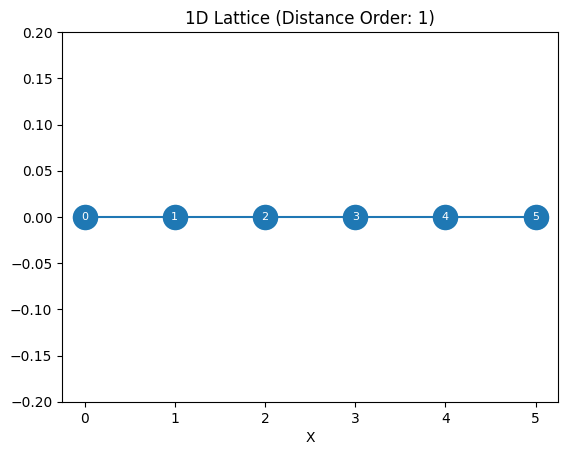

<Axes: title={'center': '1D Lattice (Distance Order: 1)'}, xlabel='X'>

In [ ]:
g = nk.graph.Hypercube(length = 6, n_dim = 1, pbc = False)
# length là độ dài, n_dim là chiều của đồ thị và pbc = False tức là đầu và cuối đồ thị không tạo thành cạnh với nhau
g.draw()

Từ đó, hãy thử vẽ các đồ thị biểu diễn các qubit được sắp xếp theo hypercube trong không gian 2, 3 chiều với độ dài cạnh lớn hơn


In [ ]:
g = # TODO: Implement here
g.draw()

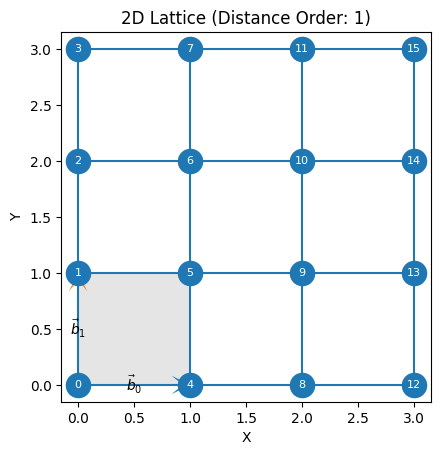

<Axes: title={'center': '2D Lattice (Distance Order: 1)'}, xlabel='X', ylabel='Y'>

In [ ]:
# Với L = 4 ở không gian 2 chiều
g = nk.graph.Hypercube(length = 4, n_dim = 2, pbc = False)
g.draw()

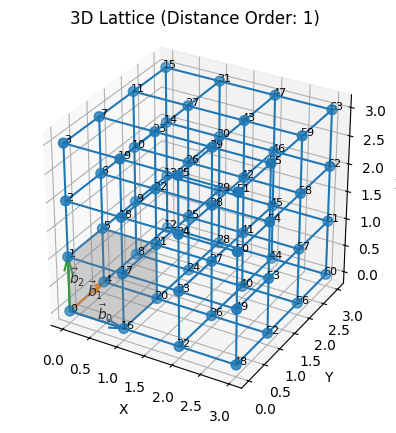

<Axes3D: title={'center': '3D Lattice (Distance Order: 1)'}, xlabel='X', ylabel='Y', zlabel='Z'>

In [ ]:
# Với L = 4 ở không gian 3 chiều
g = nk.graph.Hypercube(length = 4, n_dim = 3, pbc = False)
g.draw()

Hay nếu không dùng netket, chúng ta có thể mô tả lại đồ thị biểu diễn các qubit như sau

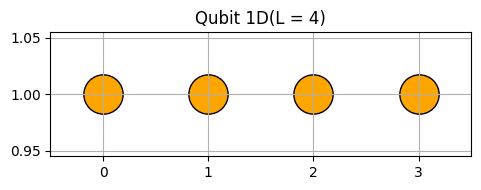

In [ ]:
# Vẽ đồ thị 1D
# Kích thước đường thẳng
L = 4

# Tạo tọa độ x với y = 1 cho từng qubit
positions = [(x, 1) for x in range (L)]
xs, ys = zip(*positions)

# Vẽ biểu đồ
plt.figure(figsize =(5, 2))
plt.scatter(xs, ys, s = 800, c = 'orange', edgecolors = 'black')

# Tùy chọn hiển thị
plt.title(f'Qubit 1D(L = {L})')
plt.xticks(range(L))
plt.grid(True)

# Đảm bảo tỷ lệ ô vuông
plt.xlim(-0.5, L - 0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Vẽ đồ thị 2D
# Kích thước hình vuông
L = #TODO : implement here

# Tạo tọa độ (x, y) cho từng qubit
positions = #TODO : implement here
xs, ys = zip(*positions)

# Vẽ biểu đồ
plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, s=800, c = 'orange', edgecolors = 'black')

# Tùy chọn hiển thị
plt.title('Qubit 2D(L = 4)')
plt.xticks(range(L))
plt.yticks(range(L))
plt.grid(True)

# Đảm bảo tỷ lệ ô vuông
plt.xlim(-0.5, L - 0.5)
plt.ylim(-0.5, L - 0.5)

plt.tight_layout()
plt.show()

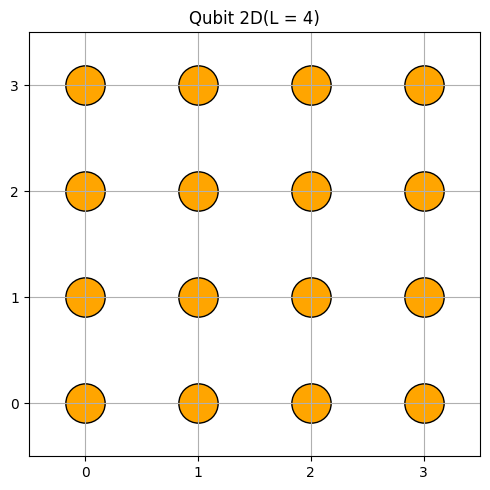

In [ ]:
# Vẽ đồ thị 2D (Đáp án)
# Kích thước hình vuông
L = 4

# Tạo tọa độ (x, y) cho từng qubit
positions = [(x, y) for x in range(L) for y in range (L)]
xs, ys = zip(*positions)

# Vẽ biểu đồ
plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, s=800, c = 'orange', edgecolors = 'black')

# Tùy chọn hiển thị
plt.title('Qubit 2D(L = 4)')
plt.xticks(range(L))
plt.yticks(range(L))
plt.grid(True)

# Đảm bảo tỷ lệ ô vuông
plt.xlim(-0.5, L - 0.5)
plt.ylim(-0.5, L - 0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Thêm thư viện để biểu diễn không gian 3 chiều
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Vẽ đồ thị 3D
# Kích thước hình lập phương
L = #TODO : implement here

# Tạo tọa độ (x, y, z) cho từng qubit
positions = #TODO : implement here

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Tách tọa độ
xs, ys, zs = zip(*positions)

# Vẽ các qubit
ax.scatter(xs, ys, zs, c = 'orange', s = 600, edgecolors = 'k')

# Cài đặt trục
ax.set_xlim(-0.5, L - 0.5)
ax.set_ylim(-0.5, L - 0.5)
ax.set_zlim(-0.5, L - 0.5)
ax.set_title('3D Qubit ')

plt.tight_layout()
plt.show()

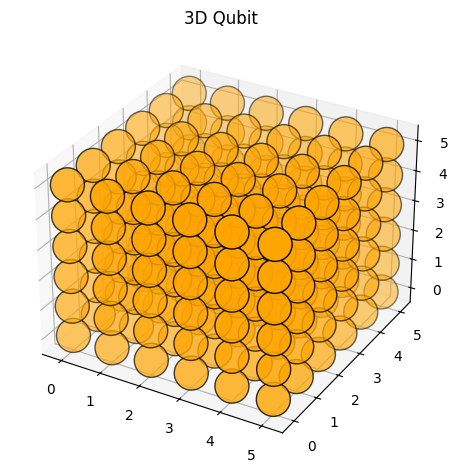

In [ ]:
# Vẽ đồ thị 3D (Đáp án)
# Kích thước hình lập phương
L = 6

positions = [(x, y, z) for x in range(L) for y in range(L) for z in range(L)]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Tách tọa độ
xs, ys, zs = zip(*positions)

# Vẽ các qubit
ax.scatter(xs, ys, zs, c = 'orange', s = 600, edgecolors = 'k')

# Cài đặt trục
ax.set_xlim(-0.5, L - 0.5)
ax.set_ylim(-0.5, L - 0.5)
ax.set_zlim(-0.5, L - 0.5)
ax.set_title('3D Qubit ')

plt.tight_layout()
plt.show()

Thế ngoài Hypercube, còn có các loại đồ thị nào nữa không ? Câu trả lời là còn rất nhiều nhưng ở đây, chúng ta sẽ tìm hiểu về Complete Graph và Regular Graph

Complete Graph là gì ? Nó là loại đồ thị mà các nút trong đồ thị đều tạo thành cạnh với các nút còn lại. Và với khái niệm như thế, hãy thử viết hàm để gọi và vẽ một Complete Graph


In [ ]:
def create_CGraph(N):

  # Khai báo các cạnh trong Complete Graph, đảm bảo không bị trùng cạnh
  edges = # TODO : implement here
  # Ví dụ : edges = (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)] với N = 4

  # Khởi tạo đồ thị với các cạnh trên
  G = nx.Graph()
  G.add_nodes_from(range(N))
  G.add_edges_from(edges)

  # Vẽ đồ thị
  pos = nx.circular_layout(G)
  plt.figure()
  nx.draw(G, pos, with_labels = True, node_color = 'lightblue', edge_color = 'gray', node_size = 600, font_size = 12)
  plt.title(f" Complete Graph với {N} nút ")
  plt.axis('equal')
  plt.show()

In [ ]:
create_CGraph(9) # Chạy thử hàm

In [ ]:
# Đáp án
def create_CGraph(N):

  # Khai báo các cạnh trong Complete Graph, đảm bảo không bị trùng cạnh
  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  # Ví dụ : edges = (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)] với N = 4

  # Khởi tạo đồ thị với các cạnh trên
  G = nx.Graph()
  G.add_nodes_from(range(N))
  G.add_edges_from(edges)

  # Vẽ đồ thị
  pos = nx.circular_layout(G)
  plt.figure()
  nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=600, font_size=12)
  plt.title(f" Complete Graph với {N} nút ")
  plt.axis('equal')
  plt.show()

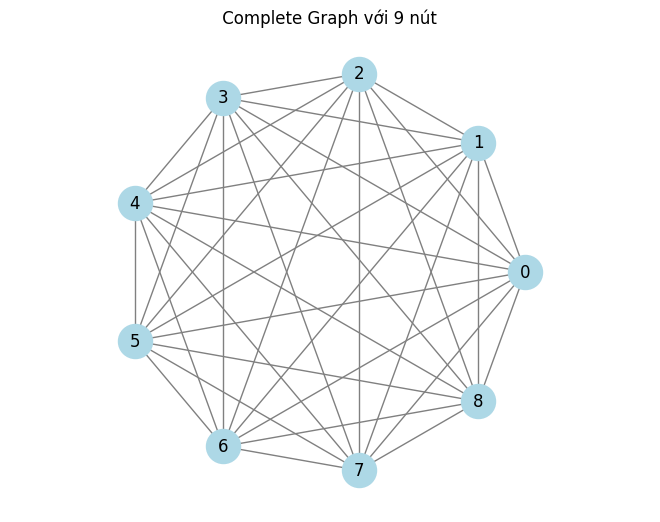

In [ ]:
create_CGraph(9) # Chạy thử hàm

Vậy còn Regular Graph ? Đồ thị này là đồ thị được xác định bởi số nút của nó và số bậc (số cạnh tạo thành với các nút khác) của mỗi nút sẽ bằng nhau. Với định nghĩa trên, ta có thể tạo hàm gọi và vẽ Regular Graph như sau  

In [ ]:
# Tạo hàm vẽ Regular Graph với số nút là N và số bậc là k
def create_RGraph(N, k):

  # Chúng ta không thể tạo hàm với N và k đều là số lẻ(có thể tự kiểm chứng) nên chúng ta sẽ báo lỗi với N và k trong trường hợp này
  assert N * k % 2 == 0, "Số nút hoặc số bậc hoặc cả 2 đều phải là số chẵn"

  # Tạo và vẽ đồ thị
  G = nx.random_regular_graph(d=k, n=N)
  pos = nx.circular_layout(G)
  plt.figure()
  nx.draw(G, pos, with_labels = True, node_color = 'lightblue', edge_color = 'gray', node_size = 600, font_size = 12)
  plt.title(f"Regular Graph với {N} nút và bậc {k} ")
  plt.axis('equal')
  plt.show()

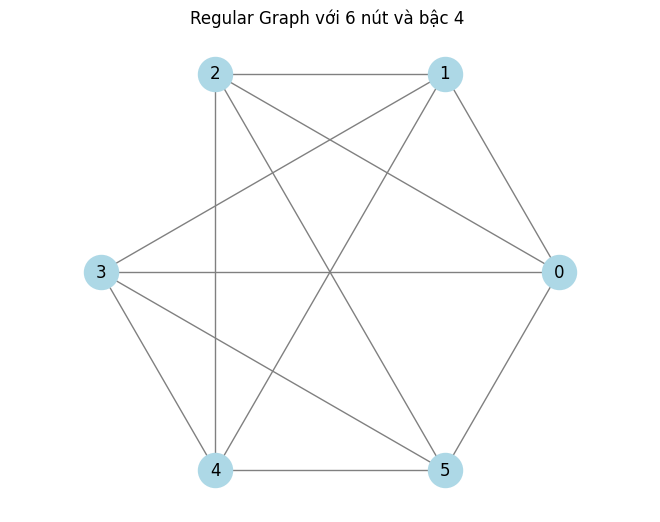

In [ ]:
create_RGraph(6, 4)

#3. Tính năng lượng cơ bản của một hệ Qubit bằng chéo hóa chính xác

Tính năng lượng cơ bản của hệ các Qubit trong không gian 1 chiều với chiều dài L = 10

In [ ]:
g = nk.graph.Hypercube(length = 10, n_dim = 1, pbc = False)

# Xác định không gian Hilbert
hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)

# Khai báo toán tử Hamiltonian
ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

# Tính thời gian từ lúc máy bắt đầu tính
start = time.time()

# Tính giá trị riêng của mô hình Heisenberg, trả về tập dữ liệu được sắp xếp từ bé đến lớn mà không trả về vector riêng
evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)

# Dừng đếm thời gian kể từ lúc máy tính xong
end = time.time()

# Năng lượng thấp nhất ứng với giá trị riêng thấp nhất, được xếp đầu tiên trong tập evals
exact_gs_val = evals[0]

# Thời gian máy tính cần để tính được năng lượng cơ bản của hệ Heisenberg(được làm tròn đến 2 chữ số)
runtime = round(end - start, 2)
print(f" Năng lượng của hệ 1D với L = 10 ở trên là E0 = {exact_gs_val} với thời gian tính là {runtime}s" )

 Năng lượng của hệ 1D với L = 10 ở trên là E0 = -17.032140829131492 với thời gian tính là 0.01s


Vậy từ đoạn code tính năng lượng cơ bản với các qubit được sắp xếp theo không gian 1 chiều trên, hãy tạo hàm tính năng lượng cơ bản với Hypercube có độ dài cạnh L trong không gian n chiều

In [ ]:
def cal_ex_hyp(L, n):

  # TODO : implement here

  return exact_gs_val, runtime

In [ ]:
# Đáp án
def cal_ex_hyp(L, n):

  g = nk.graph.Hypercube(length = L, n_dim = n, pbc = False)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  start = time.time()
  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  end = time.time()

  exact_gs_val = evals[0]
  runtime = round(end - start, 2)

  return exact_gs_val, runtime

In [ ]:
E, runtime = cal_ex_hyp(4, 2) # Tính năng lượng cơ bản của hệ qubits 2 chiều với độ dài là 4
print(f" Năng lượng của hệ nD với L ở trên là E0 = {E} với thời gian tính là {runtime}s" )

 Năng lượng của hệ nD với L ở trên là E0 = -6.464101615137755 với thời gian tính là 3.33s


Tạo hàm tính năng lượng cơ bản của hệ Qubit kiểu Complete Graph với số nút là N

In [ ]:
def cal_CGraph(N):

  edges = #TODO : implement here
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = N)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  start = time.time()
  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  end = time.time()

  exact_gs_val = evals[0]
  runtime = round(end - start, 2)

  return exact_gs_val, runtime

In [ ]:
E, runtime = cal_CGraph(6)
print(f" Năng lượng của hệ Qubit kiểu Complete Graph ở trên là E0 = {E} với thời gian tính là {runtime}s" )

In [ ]:
# Đáp án
def cal_CGraph(N):

  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = N)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  start = time.time()
  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  end = time.time()

  exact_gs_val = evals[0]
  runtime = round(end - start, 2)

  return exact_gs_val, runtime

In [ ]:
E, runtime = cal_CGraph(6)
print(f" Năng lượng của hệ Qubit kiểu Complete Graph ở trên là E0 = {E} với thời gian tính là {runtime}s" )

 Năng lượng của hệ Qubit kiểu Complete Graph ở trên là E0 = -9.000000000000007 với thời gian tính là 0.01s


Fact: Năng lượng cơ bản thấp nhất của hệ Qubit sắp xếp theo kiểu Complete Graph có giá trị -3N/2

Tạo hàm tính năng lượng cơ bản của hệ Qubit kiểu Regular Graph với số nút là N và số đỉnh là k

In [ ]:
def cal_RGraph(N, k):

  assert N * k % 2 == 0, "Số nút hoặc số bậc hoặc cả 2 đều phải là số chẵn"

  G = #TODO : implement here
  g = nk.graph.Graph(list(G.edges()))
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = N)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  start = time.time()
  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  end = time.time()

  exact_gs_val = evals[0]
  runtime = round(end - start, 2)

  return exact_gs_val, runtime

In [ ]:
E, runtime = cal_RGraph(6, 4)
print(f" Năng lượng của hệ Qubit kiểu Regular Graph ở trên là E0 = {E} với thời gian tính là {runtime}s" )

In [ ]:
# Đáp án
def cal_RGraph(N, k):

  assert N * k % 2 == 0, "Số nút hoặc số bậc hoặc cả 2 đều phải là số chẵn"

  G = nx.random_regular_graph(d=k, n=N)
  g = nk.graph.Graph(list(G.edges()))
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = N)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  start = time.time()
  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  end = time.time()

  exact_gs_val = evals[0]
  runtime = round(end - start, 2)

  return exact_gs_val, runtime

In [ ]:
E, runtime = cal_RGraph(6, 4)
print(f" Năng lượng của hệ Qubit kiểu Regular Graph ở trên là E0 = {E} với thời gian tính là {runtime}s" )

 Năng lượng của hệ Qubit kiểu Regular Graph ở trên là E0 = -12.0 với thời gian tính là 1.62s


#4. Về Feed Forward Neural Network và sử dụng

Như trong slide đã giới thiệu thì FeedForward Neural Network là một mạng neuron nhân tạo, mà trong đó được chia thành 3 lớp (lớp đầu vào, lớp ẩn và lớp đầu ra) Lớp đầu vào có khoảng N neuron, lớp đầu ra có thể chia ra thành nhiều lớp nhỏ nữa khoảng N * 2 neuron cho mỗi lớp và lớp đầu ra có 1 neuron. Thông tin được đưa vào chỉ truyền theo 1 chiều: từ đầu vào → lớp ẩn → lớp đầu ra.


Và để tạo model FFNN1, FFNN2 tương ứng với số lớp trong lớp ẩn bằng 1, 2 thì ta có như sau


In [ ]:
class ffnn1(nnx.Module):

    def __init__(self, N: int, *, rngs: nnx.Rngs):
        self.linear = nnx.Linear(in_features=N, out_features=2 * N, dtype=jnp.complex128, rngs=rngs)

    def __call__(self, x: jax.Array):
        x = self.linear(x)
        x = nk.nn.activation.log_cosh(x)
        return jnp.sum(x, axis=-1)

In [ ]:
class ffnn2(nnx.Module):

    def __init__(self, N: int, *, rngs: nnx.Rngs):
        self.linear1 = nnx.Linear(in_features = N, out_features = N * 2, dtype=jnp.complex128, rngs=rngs)
        self.linear2 = nnx.Linear(in_features = N * 2, out_features = N , dtype=jnp.complex128, rngs=rngs)

    def __call__(self, x: jax.Array):
        x = self.linear1(x)
        x = nk.nn.activation.log_cosh(x)
        x = self.linear2(x)
        x = nk.nn.activation.log_cosh(x)
        return jnp.sum(x, axis=-1)

Viết hàm chạy và vẽ đồ thị biểu diễn sự hội tụ của model, so sánh với năng lượng cơ bản được tính bằng chéo hóa (trong trường hợp này là với hệ qubit sắp xếp giống Hypercube Graph với độ dài cạnh là L, chiều không gian là n và chạy bằng model FFNN1 hay FFNN2)

In [ ]:
def chay_model(L, n, model):

  g = nk.graph.Hypercube(length = L, n_dim = n, pbc = False)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'FFNN1' :
    run_model = ffnn1(N = hi.size, rngs = nnx.Rngs(1))
  elif model == 'FFNN2' :
    run_model = ffnn2(N = hi.size, rngs = nnx.Rngs(1))

  # Sinh cấu hình spin ngẫu nhiên
  sa =  nk.sampler.MetropolisExchange(hi, graph = g)

  # Tạo hàm sóng biến phân bằng phương pháp Monte Carlo
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)

  # Tối ưu hàm sóng bằng cách hạ gradient với learning rate tự cho(Càng cao thì cập nhật càng nhanh nhưng dễ mất ổn định)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)

  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200) # Chạy model với 200 lần lặp lại
  end = time.time()

  runtime = round(end - start, 2)

  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  exact_gs_energy = evals[0]

  # Truy cập và lấy dữ liệu từ file res.log, lấy dữ liệu cần thiết để vẽ đồ thị
  data = json.load(open("res.log"))

  iters_FF = data['Energy']['iters']
  energy_FF = data['Energy']['Mean']['real']

  plt.figure()

  plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
  plt.xlabel(f'Iteration, time = {runtime}')
  plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
  plt.ylabel('Energy')
  plt.title(f"Energy vs Iteration (Model {model}, L = {L}, n_dim = {n})")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  return

  0%|          | 0/200 [00:00<?, ?it/s]

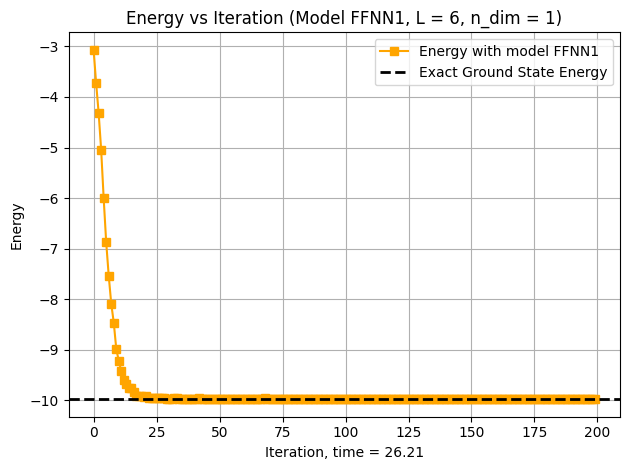

In [ ]:
chay_model(6, 1, 'FFNN1')

Dễ thấy năng lượng tính theo model FFNN1 đã hội tụ với đường năng lượng được tính từ chéo hóa chính xác từ sớm, nhưng nó vẫn tiếp tục chạy cho đến lần lặp thứ 200. Để dừng lặp lại sớm hơn, chúng ta thêm callback vào hàm sử dụng.

In [ ]:
def chay_model(L, n, model):

  callback = EarlyStopping(min_delta = 5e-3, patience = 20)

  g = nk.graph.Hypercube(length = L, n_dim = n, pbc = False)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'FFNN1' :
    run_model = ffnn1(N = hi.size, rngs = nnx.Rngs(1))
  elif model == 'FFNN2' :
    run_model = ffnn2(N = hi.size, rngs = nnx.Rngs(1))

  sa =  nk.sampler.MetropolisExchange(hi, graph = g)
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)
  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200, callback = callback) #
  end = time.time()

  runtime = round(end - start, 2)

  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  exact_gs_energy = evals[0]

  data = json.load(open("res.log"))

  iters_FF = data['Energy']['iters']
  energy_FF = data['Energy']['Mean']['real']

  plt.figure()

  plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
  plt.xlabel(f'Iteration, time = {runtime}')
  plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
  plt.ylabel('Energy')
  plt.title(f"Energy vs Iteration (Model {model}, L = {L}, n_dim = {n})")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  return

  0%|          | 0/200 [00:00<?, ?it/s]

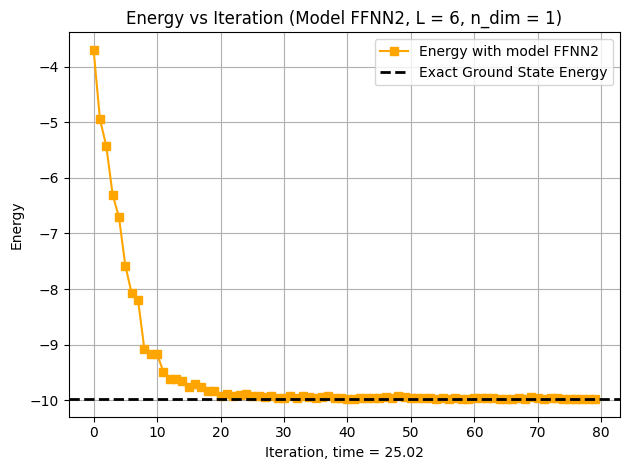

In [ ]:
chay_model(6, 1, 'FFNN2')

Để xây dựng đồ thị so sánh tốc độ chạy của FFNN1, FFNN2 và cả chéo hóa chính xác với không gian 1 chiều và L tăng dần, ta có thể làm như sau

In [ ]:
def chay_model(L, n, model):
  callback = EarlyStopping(min_delta = 5e-3, patience = 20)
  g = nk.graph.Hypercube(length = L, n_dim = n, pbc = False)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'FFNN1' :
    run_model = ffnn1(N = hi.size, rngs = nnx.Rngs(1))
  elif model == 'FFNN2' :
    run_model = ffnn2(N = hi.size, rngs = nnx.Rngs(1))

  sa =  nk.sampler.MetropolisExchange(hi, graph = g)
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)
  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200, callback = callback)
  end = time.time()

  runtime = round(end - start, 2)

  return L, runtime
def cal_ex_hyp(L, n):

  g = nk.graph.Hypercube(length = L, n_dim = n, pbc = False)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)
  start = time.time()
  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  end = time.time()
  exact_gs_val = evals[0]
  runtime = round(end - start, 2)
  return exact_gs_val, runtime

In [ ]:
FFNN1 = []
for i in range(4, 32, 4):
  L, runtime = chay_model(i, 1, 'FFNN1')
  FFNN1.append(runtime)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
FFNN2 = []
for i in range(4, 32, 4):
  L, runtime = chay_model(i, 1, 'FFNN2')
  FFNN2.append(runtime)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
exact_diag = []
for i in range(4, 24, 4):
  E, runtime = cal_ex_hyp(i, 1)
  exact_diag.append(runtime)

In [ ]:
 # Crash warning nếu chạy thẳng từ 4 đến 24
E, runtime = cal_ex_hyp(24, 1)
exact_diag.append(runtime)

Chỉ thử được tới L = 24 với chéo hóa chính xác vì khi L = 28, số qubit sẽ là 28 và máy tính không thể tiếp tục tính, trong khi FFNN1 và FFNN2 vẫn có thể hội tụ, cho chúng ta dự đoán về kết quả chính xác

In [ ]:
# E, runtime = cal_ex_hyp(28, 1)
# Crash warning !!!

Từ đây, chúng ta có thể dựng nên đồ thị thể hiện tốc độ chạy của 3 cách khác nhau trên như sau

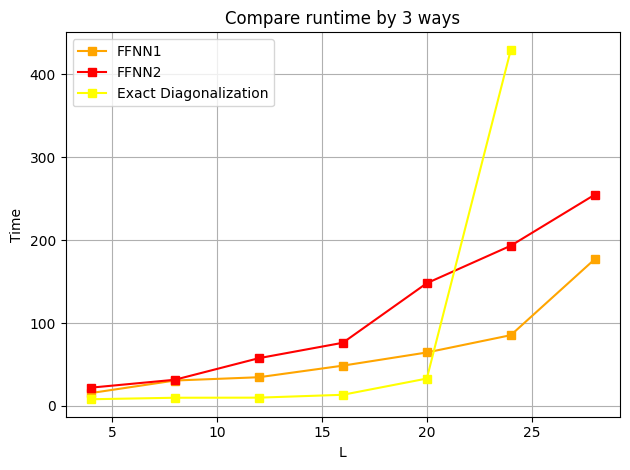

In [ ]:
L_values = list(range(4, 32, 4))
L_values_exact = list(range(4, 28, 4))

plt.figure()
plt.plot(L_values, FFNN1, color = 'orange', marker = 's', label ='FFNN1')
plt.plot(L_values, FFNN2, color = 'red', marker = 's', label ='FFNN2')
plt.plot(L_values_exact, exact_diag, color = 'yellow', marker = 's', label ='Exact Diagonalization')
plt.xlabel('L')
plt.ylabel('Time')
plt.title('Compare runtime by 3 ways')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Khi không thể tính bằng chéo hóa chính xác ở không gian 1 chiều, ta có thể dự đoán năng lượng ở trạng thái cơ bản bằng model FFNN1 và FFNN2, thì ở không gian 2 chiều cũng tương tự với L = 6 và không gian 3 chiều với L = 4. Với các L lớn hơn ở 2 chiều và 3 chiều hoặc từ L = 4 ở không gian 4 chiều thì sẽ bị crash.


In [ ]:
def chay_model(L, n, model):
  callback = EarlyStopping(min_delta = 5e-3, patience = 20)
  g = nk.graph.Hypercube(length = L, n_dim = n, pbc = False)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'FFNN1' :
    run_model = ffnn1(N = hi.size, rngs = nnx.Rngs(1))
  elif model == 'FFNN2' :
    run_model = ffnn2(N = hi.size, rngs = nnx.Rngs(1))

  sa =  nk.sampler.MetropolisExchange(hi, graph = g)
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)
  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200, callback = callback)
  end = time.time()

  runtime = round(end - start, 2)

  data = json.load(open("res.log"))

  iters_FF = data['Energy']['iters']
  energy_FF = data['Energy']['Mean']['real']

  plt.figure()

  plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
  plt.xlabel(f'Iteration, time = {runtime}')
  plt.ylabel('Energy')
  plt.title(f"Energy vs Iteration (Model {model}, L = {L}, n_dim = {n})")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  return

  0%|          | 0/200 [00:00<?, ?it/s]

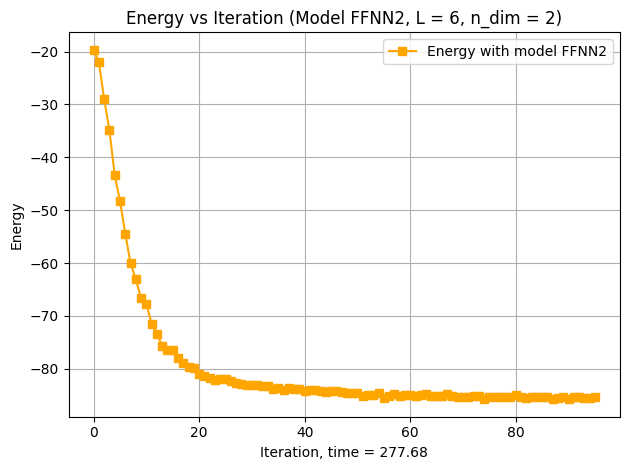

In [ ]:
chay_model(6, 2, 'FFNN2')

  0%|          | 0/200 [00:00<?, ?it/s]

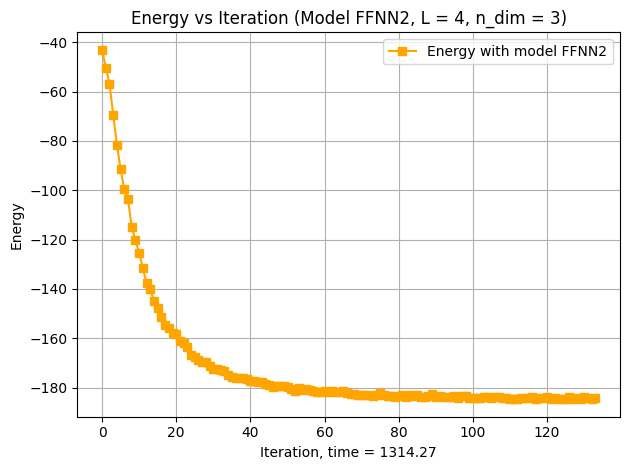

In [ ]:
chay_model(4, 3, 'FFNN2') # Tốn 1700s để chạy, trong lúc nó chạy thì mình đi kiếm đồ ăn là đẹp

In [ ]:
#chay_model(4, 4, 'FFNN2')
# Crash warning !!!
# Có thể chạy ngay trên máy hoặc colab pro nhưng tốn ~ 9000s :D

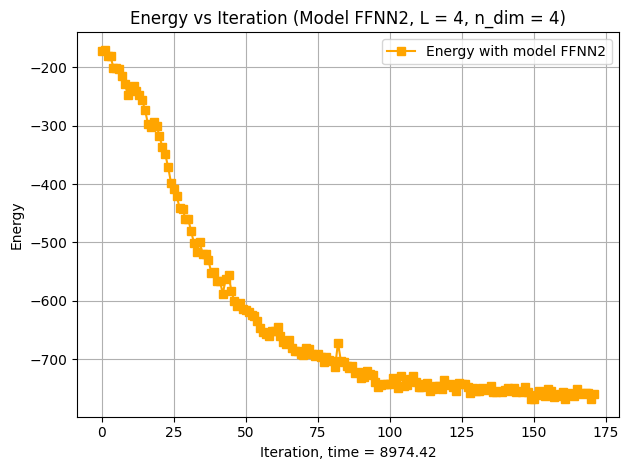

Viết hàm chạy và vẽ đồ thị biểu diễn sự hội tụ của model, so sánh với năng lượng cơ bản được tính bằng chéo hóa (trong trường hợp này là với qubit sắp xếp giống Complete Graph với N nút và chạy bằng model FFNN1 hay FFNN2)

In [ ]:
def chay_model_CGraph(N, model):

  callback = EarlyStopping(min_delta = 5e-3, patience = 20)

  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'FFNN1' :
    run_model = ffnn1(N = hi.size, rngs = nnx.Rngs(1))
  elif model == 'FFNN2' :
    run_model = ffnn2(N = hi.size, rngs = nnx.Rngs(1))

  sa =  nk.sampler.MetropolisExchange(hi, graph = g)
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)
  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200, callback = callback) #
  end = time.time()

  runtime = round(end - start, 2)

  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  exact_gs_energy = evals[0]

  data = json.load(open("res.log"))

  iters_FF = data['Energy']['iters']
  energy_FF = data['Energy']['Mean']['real']

  plt.figure()

  plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
  plt.xlabel(f'Iteration, time = {runtime}')
  plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
  plt.ylabel('Energy')
  plt.title(f"Energy vs Iteration (Model {model}, N={N})")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  return

  0%|          | 0/200 [00:00<?, ?it/s]

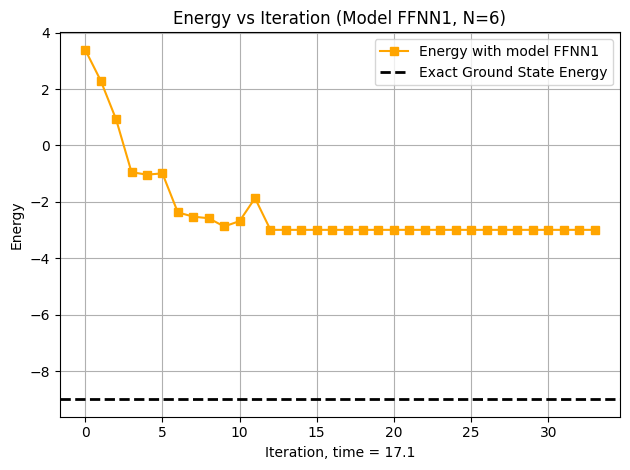

In [ ]:
chay_model_CGraph(6, 'FFNN1')

  0%|          | 0/200 [00:00<?, ?it/s]

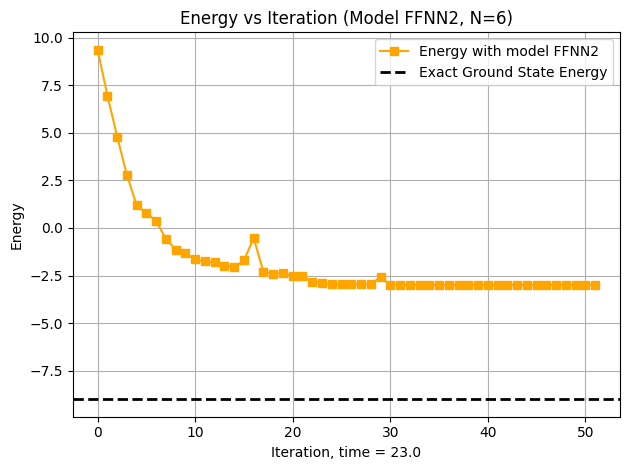

In [ ]:
chay_model_CGraph(6, 'FFNN2')

Ta thấy đường thể hiện năng lượng của FFNN1, FFNN2 hội tụ dần nhưng không hội tụ về cùng với đường mà chéo hóa chính xác tính được, tức là tới đây, đã có vấn đề xảy ra với FFNN1, FFNN2.

Thử với Regular Graph thì sao ? Dưới đây là hàm tính năng lượng ở trạng thái cơ bản cho hệ qubit sắp xếp giống Regular Graph với N nút và bậc k.

In [ ]:
def chay_model_RGraph(N, k, model):

  callback = EarlyStopping(min_delta = 5e-3, patience = 20)

  assert N * k % 2 == 0, "Số nút hoặc số bậc hoặc cả 2 đều phải là số chẵn"

  G = nx.random_regular_graph(d=k, n=N)
  g = nk.graph.Graph(list(G.edges()))
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'FFNN1' :
    run_model = ffnn1(N = hi.size, rngs = nnx.Rngs(1))
  elif model == 'FFNN2' :
    run_model = ffnn2(N = hi.size, rngs = nnx.Rngs(1))

  sa =  nk.sampler.MetropolisExchange(hi, graph = g)
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)
  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200, callback = callback) #
  end = time.time()

  runtime = round(end - start, 2)

  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  exact_gs_energy = evals[0]

  data = json.load(open("res.log"))

  iters_FF = data['Energy']['iters']
  energy_FF = data['Energy']['Mean']['real']

  plt.figure()

  plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
  plt.xlabel(f'Iteration, time = {runtime}')
  plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
  plt.ylabel('Energy')
  plt.title(f"Energy vs Iteration (Model {model}, N={N}, k ={k}")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  return

  0%|          | 0/200 [00:00<?, ?it/s]

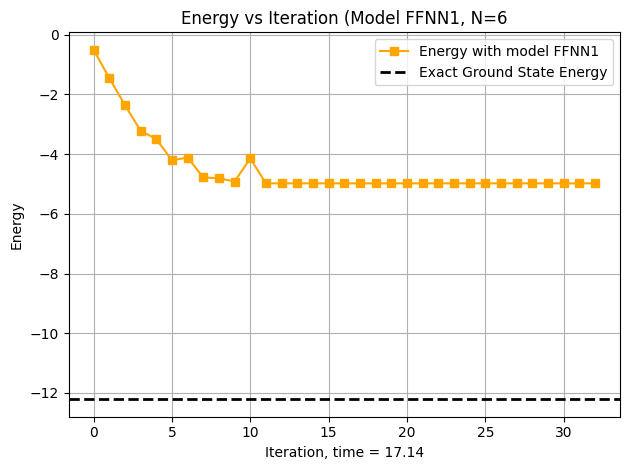

In [ ]:
chay_model_RGraph(6, 3, 'FFNN1')

  0%|          | 0/200 [00:00<?, ?it/s]

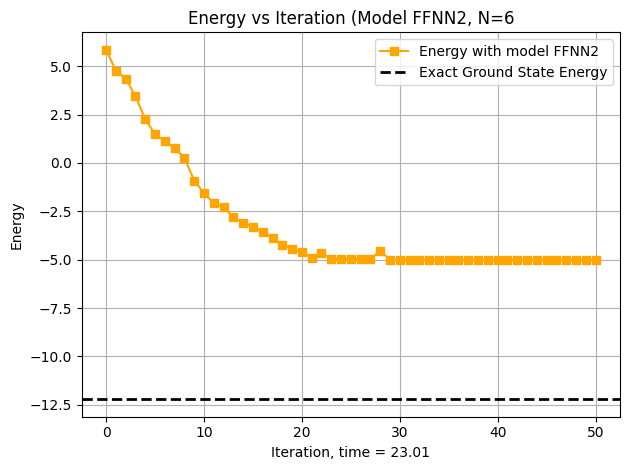

In [ ]:
chay_model_RGraph(6, 3, 'FFNN2')

Kết quả trả về vẫn tương tự như với Complete Graph, FFNN1 và FFNN2 đều không thể cho kết quả hội tụ về với giá trị được tính bằng phương pháp chéo hóa chính xác.

#5. Một số nỗ lực để hội tụ đường năng lượng tính bằng Neural Network và Exact Diagonalization với hệ qubit sắp xếp theo kiểu Complete Graph

Thế còn việc thử các model khác thì sao ? Chúng ta sẽ thử lại với model CNN, GCNN, Transformer, RBM và Jastrow Ansatz sau đây

In [ ]:
class cnn(nnx.Module):

    def __init__(self, N: int, *, rngs: nnx.Rngs):
        super().__init__()
        self.conv1 = nnx.Conv(in_features = 1, out_features = 4, kernel_size = 3, padding = "SAME", dtype = jnp.complex128, rngs = rngs)
        self.conv2 = nnx.Conv(in_features = 4, out_features = 8, kernel_size = 3, padding = "SAME", dtype = jnp.complex128, rngs = rngs)
        self.dense = nnx.Linear(in_features = 8 * N, out_features = 1, dtype = jnp.complex128, rngs = rngs)

    def __call__(self, x):
        if x.ndim == 2:
            x = jnp.expand_dims(x, -1)
        x = self.conv1(x)
        x = jnp.abs(x)
        x = self.conv2(x)
        x = jnp.abs(x)
        x = x.reshape(x.shape[0], -1)
        x = self.dense(x)

        return jnp.squeeze(x, axis=-1)

In [ ]:
class gcnn(nnx.Module):
    def __init__(self, N, graph, *, rngs):
        self.graph = graph
        self.linear1 = nnx.Linear(in_features=N, out_features=2 * N, rngs=rngs)
        self.linear2 = nnx.Linear(in_features=2 * N, out_features=1, rngs=rngs)

    def __call__(self, x):

        adj = jnp.zeros((x.shape[-1], x.shape[-1]))
        for i, j in self.graph.edges():
            adj = adj.at[i, j].set(1.0)
            adj = adj.at[j, i].set(1.0)

        deg = jnp.sum(adj, axis=1, keepdims=True)
        adj_norm = adj / (deg + 1e-8)

        x = jnp.einsum('ij,bj->bi', adj_norm, x)

        x = jnp.tanh(self.linear1(x))
        x = self.linear2(x)
        return jnp.squeeze(x, axis=-1)

In [ ]:
class SimpleTransformer(nnx.Module):
    def __init__(self, N, *, rngs):
        self.linear_q = nnx.Linear(in_features=N, out_features=N, rngs=rngs)
        self.linear_k = nnx.Linear(in_features=N, out_features=N, rngs=rngs)
        self.linear_v = nnx.Linear(in_features=N, out_features=N, rngs=rngs)
        self.linear_out = nnx.Linear(in_features=N, out_features=1, rngs=rngs)

    def __call__(self, x):
        Q = self.linear_q(x)
        K = self.linear_k(x)
        V = self.linear_v(x)

        attn_scores = jnp.matmul(Q, K.T) / jnp.sqrt(x.shape[-1])
        attn_weights = jax.nn.softmax(attn_scores, axis=-1)
        attn_output = jnp.matmul(attn_weights, V)

        output = self.linear_out(attn_output)

        return jnp.squeeze(output, axis=-1)

In [ ]:
def chay_model_CGraph(N, model):

  callback = EarlyStopping(min_delta = 5e-3, patience = 20)

  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges = edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  if model == 'CNN':
    run_model = cnn(N = hi.size, rngs = nnx.Rngs(1))
    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
    opt = nk.optimizer.Sgd(learning_rate = 0.01)
    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback)
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']['real']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model {model}, N = {N})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

  elif model == 'GCNN':
    run_model = gcnn(N = hi.size, graph = g, rngs = nnx.Rngs(1))

    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
    opt = nk.optimizer.Sgd(learning_rate = 0.01)
    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback)
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model {model}, N = {N})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

  elif model == 'SimpleTransformer':
    run_model = SimpleTransformer(N = hi.size, rngs = nnx.Rngs(1))

    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 3024)
    opt = nk.optimizer.Sgd(learning_rate = 0.01)
    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback)
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model {model}, N = {N})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

  elif model == 'RBM' :
    run_model = nk.models.RBM(alpha = 1, dtype = complex)
    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
    opt = nk.optimizer.Sgd(learning_rate = 0.01)
    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback)
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model {model}, N = {N})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
  elif model == 'Jastrow' :
    run_model = nk.models.Jastrow()
    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
    opt = nk.optimizer.Sgd(learning_rate = 0.01)
    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback)
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']['real']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model {model}')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model {model}, N = {N})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  return

  0%|          | 0/200 [00:00<?, ?it/s]

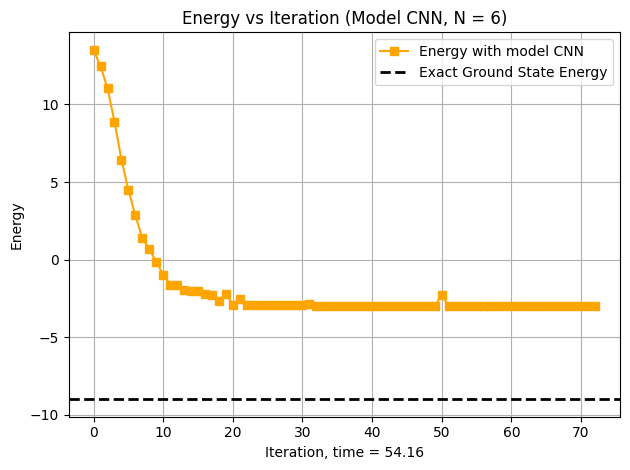

In [ ]:
chay_model_CGraph(6, 'CNN')

  0%|          | 0/200 [00:00<?, ?it/s]

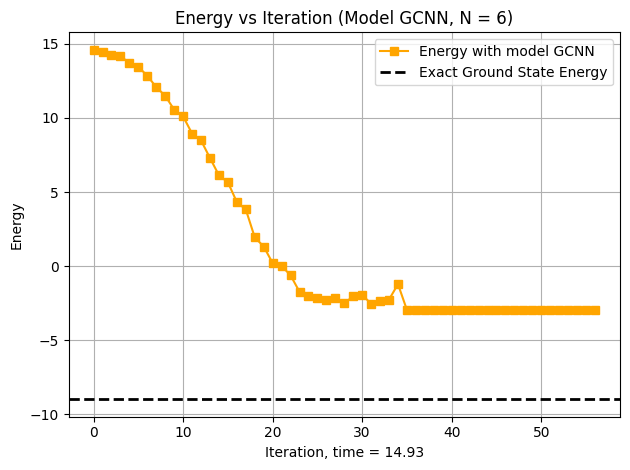

In [ ]:
chay_model_CGraph(6, 'GCNN')

In [ ]:
  #chay_model_CGraph(6, 'SimpleTransformer')
  # Crash warning !!!

  0%|          | 0/200 [00:00<?, ?it/s]

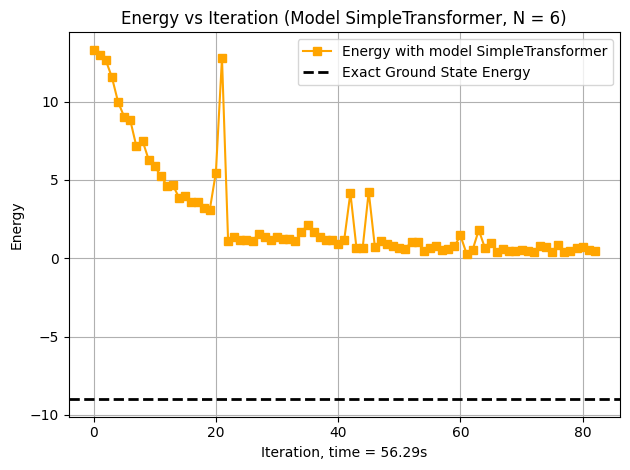

  0%|          | 0/200 [00:00<?, ?it/s]

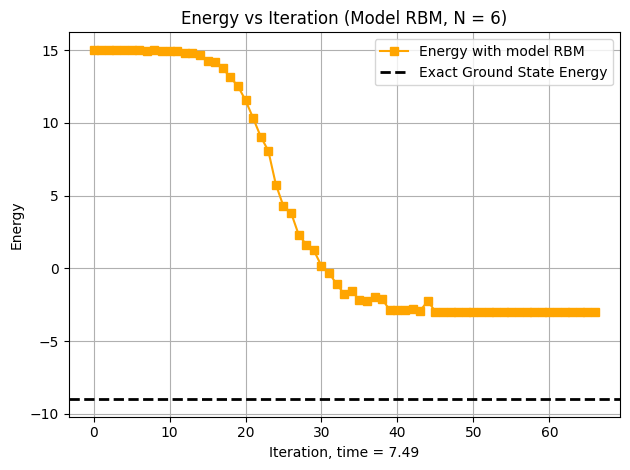

In [ ]:
chay_model_CGraph(6, 'RBM')

  0%|          | 0/200 [00:00<?, ?it/s]

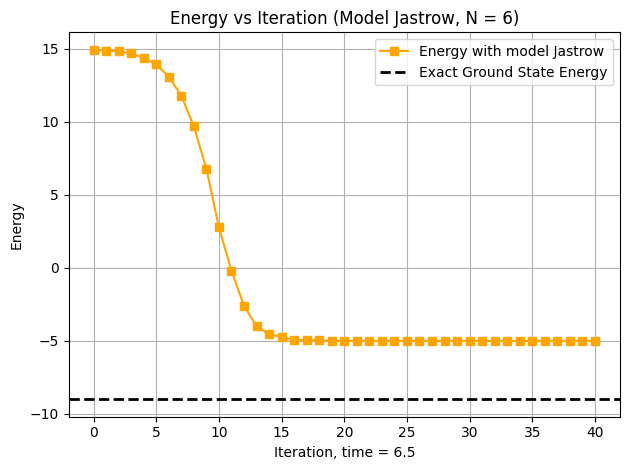

In [ ]:
chay_model_CGraph(6, 'Jastrow')

Ta thấy các model trên đều không thể vượt qua được điểm cực tiểu cục bộ, và chúng ta sẽ trở lại với model FFNN thông thường, nhưng ta trên cơ sở FFNN1 và FFNN2, ta sẽ thử với model FFNN4 với 4 hidden layer và thử thêm một số điều chỉnh với phép tính tìm điểm cực tiểu


In [ ]:
class ffnn4(nnx.Module):
    def __init__(self, N: int, *, rngs: nnx.Rngs):
        self.linear1 = nnx.Linear(in_features=N, out_features=4 * N, dtype=jnp.complex128, rngs=rngs)
        self.linear2 = nnx.Linear(in_features=4 * N, out_features=2 * N, dtype=jnp.complex128, rngs=rngs)
        self.linear3 = nnx.Linear(in_features=2 * N, out_features=N, dtype=jnp.complex128, rngs=rngs)
        self.linear4 = nnx.Linear(in_features=N, out_features=1, dtype=jnp.complex128, rngs=rngs)

    def __call__(self, x: jnp.ndarray) -> jnp.ndarray:
        x = self.linear1(x)
        x = jnp.tanh(x)
        x = self.linear2(x)
        x = jnp.tanh(x)
        x = self.linear3(x)
        x = jnp.tanh(x)
        x = self.linear4(x)
        return jnp.squeeze(x, axis = -1)

In [ ]:
def chay_model_CGraph(N):

  callback = EarlyStopping(min_delta = 5e-3, patience = 20)

  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  run_model = ffnn4(N = hi.size, rngs = nnx.Rngs(1))

  sa =  nk.sampler.MetropolisExchange(hi, graph = g)
  vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)
  opt = nk.optimizer.Sgd(learning_rate = 0.01)
  sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
  gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

  start = time.time()
  gs.run(out = "res", n_iter = 200, callback = callback) #
  end = time.time()

  runtime = round(end - start, 2)

  evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
  exact_gs_energy = evals[0]

  data = json.load(open("res.log"))

  iters_FF = data['Energy']['iters']
  energy_FF = data['Energy']['Mean']['real']

  plt.figure()

  plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model FFNN4')
  plt.xlabel(f'Iteration, time = {runtime}')
  plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
  plt.ylabel('Energy')
  plt.title(f"Energy vs Iteration (Model FFNN4, N={N})")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  return

  0%|          | 0/200 [00:00<?, ?it/s]

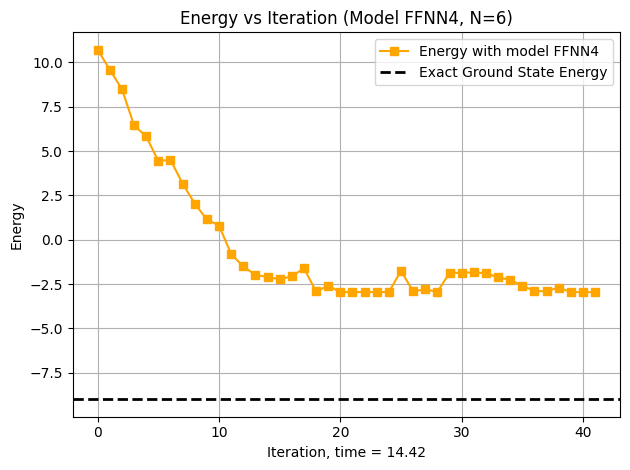

In [ ]:
chay_model_CGraph(6)

Đầu tiên là thử đổi optimizer từ SGD thành Adam cho một số trường hợp learning rate có thể sẽ phù hợp để vượt qua local minimum (người viết notebook này cũng đã thử với SGD nhưng kết quả vẫn luôn là không hội tụ T.T)

In [ ]:
def clr_schedule(step, base_lr=0.1, max_lr=5, step_size=20): #Cyclical Learning Rate (CLR) (LR lên xuống theo chu kỳ)
                                                             #Nếu thay đổi base_lr, max_lr và step_size hợp lý thì có thể vượt qua local minimum và hội tụ ở global minimum không ?
    cycle = jnp.floor(1 + step / (2 * step_size))
    x = jnp.abs(step / step_size - 2 * cycle + 1)
    scale = jnp.maximum(0, (1 - x))
    return base_lr + (max_lr - base_lr) * scale
def one_cycle_lr(step = 20, total_steps = 200, base_lr=0.1, max_lr=5, pct_up=0.3): #Một biến thể CLR: Tăng LR lên mức cao nhất ở giữa training, sau đó giảm mạnh xuống mức rất nhỏ
    up_steps = int(total_steps * pct_up)
    down_steps = total_steps - up_steps

    def lr_up(s):
        return base_lr + (max_lr - base_lr) * (s / up_steps)

    def lr_down(s):
        return max_lr - (max_lr - base_lr * 1e-2) * (s / down_steps)

    return jax.lax.cond(
        step < up_steps,
        lambda s: lr_up(s),
        lambda s: lr_down(s - up_steps),
        step
    )
def warmup_cosine_lr(step, base_lr=5, min_lr=0.01, warmup_steps=20, total_steps=200): #Warmup + Cosine Decay: Hay dùng trong Transformer, ResNet, BERT ?
    step = jnp.minimum(step, total_steps)

    def warmup():
        return base_lr * step / warmup_steps

    def cosine_decay():
        decay_steps = total_steps - warmup_steps
        progress = (step - warmup_steps) / decay_steps
        cosine = 0.5 * (1 + jnp.cos(jnp.pi * progress))
        return min_lr + (base_lr - min_lr) * cosine

    return jnp.where(step < warmup_steps, warmup(), cosine_decay())

def chay_model_CGraph(N, LR, restart_times):
  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)
  for restart_id in range(restart_times):
    print(f"========== Restart lần {restart_id + 1} ==========")
    callback = EarlyStopping(min_delta = 5e-3, patience = 40)

    run_model = ffnn4(N = hi.size, rngs = nnx.Rngs(restart_id + 1))

    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)

    if LR == 'CLR': #Cyclical Learning Rate (CLR) (LR lên xuống theo chu kỳ)
      opt = nk.optimizer.Adam(learning_rate=clr_schedule)
    if LR == '1CLR': #Một biến thể CLR: Tăng LR lên mức cao nhất ở giữa training, sau đó giảm mạnh xuống mức rất nhỏ
      opt = nk.optimizer.Adam(learning_rate=lambda step: one_cycle_lr(step))
    if LR == 'WCLR':
      opt = nk.optimizer.Adam(learning_rate=lambda step: warmup_cosine_lr(step))

    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback) #
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']['real']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model FFNN4')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model FFNN4, N={N}, Learning Rate : {LR}')")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.figure()
    plt.show()

  return

========== Restart lần 1 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

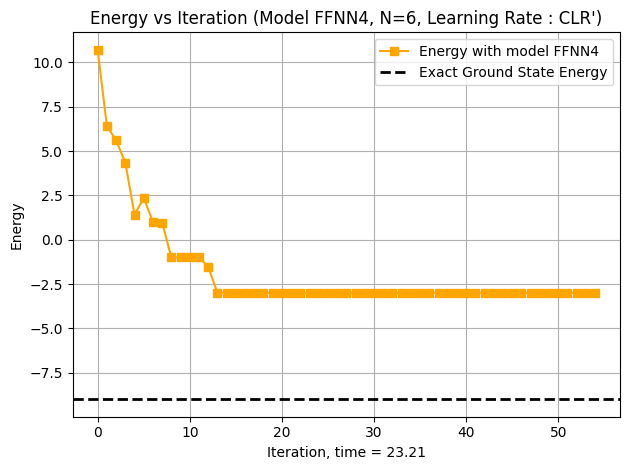

<Figure size 640x480 with 0 Axes>

========== Restart lần 2 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

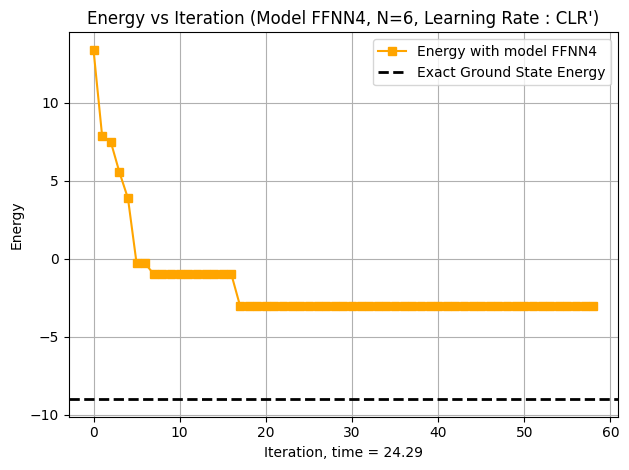

<Figure size 640x480 with 0 Axes>

========== Restart lần 3 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

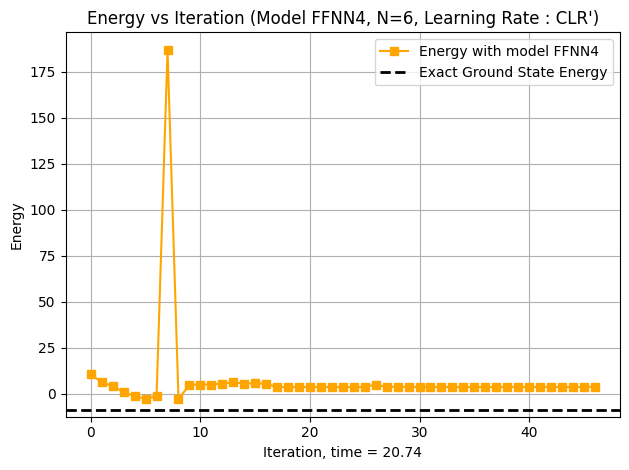

<Figure size 640x480 with 0 Axes>

========== Restart lần 4 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

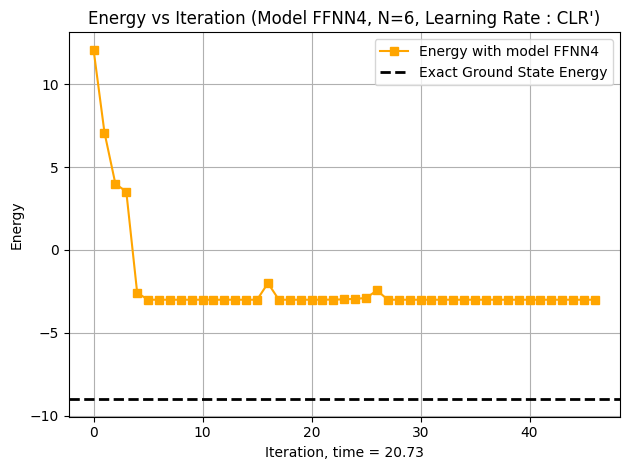

<Figure size 640x480 with 0 Axes>

========== Restart lần 5 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

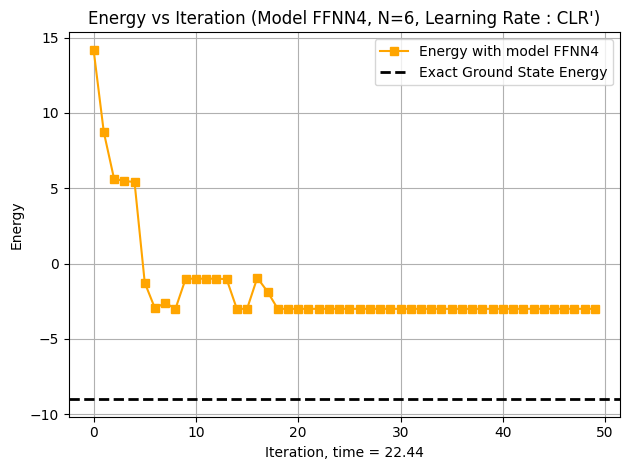

<Figure size 640x480 with 0 Axes>

In [ ]:
chay_model_CGraph(6, "CLR", restart_times= 5)

========== Restart lần 1 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

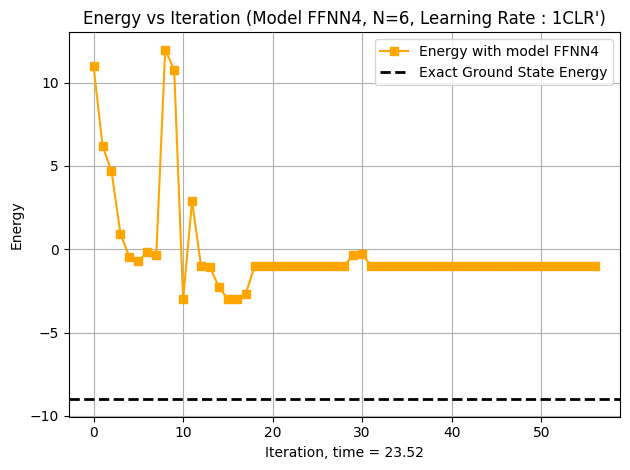

<Figure size 640x480 with 0 Axes>

========== Restart lần 2 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

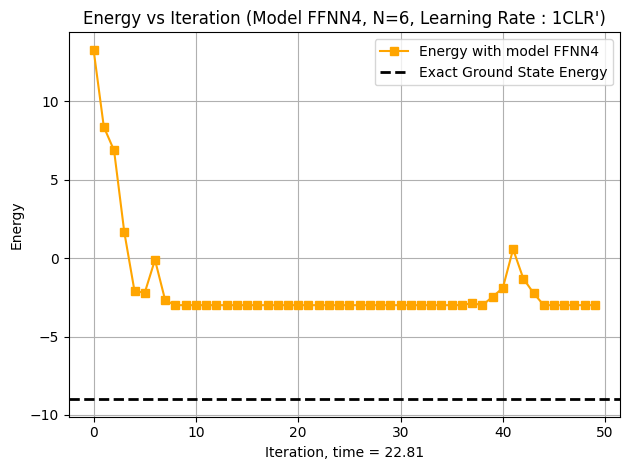

<Figure size 640x480 with 0 Axes>

========== Restart lần 3 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

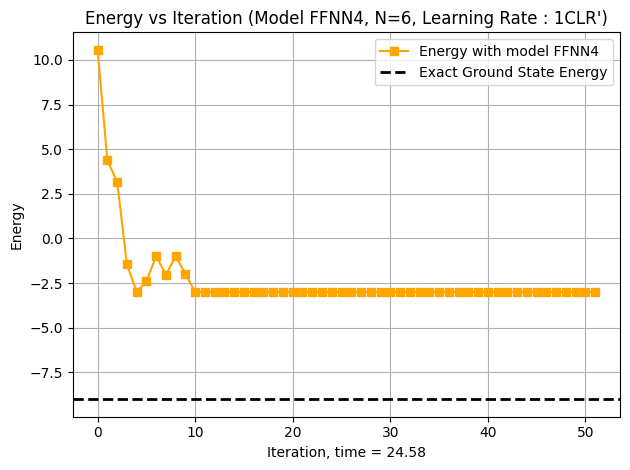

<Figure size 640x480 with 0 Axes>

========== Restart lần 4 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

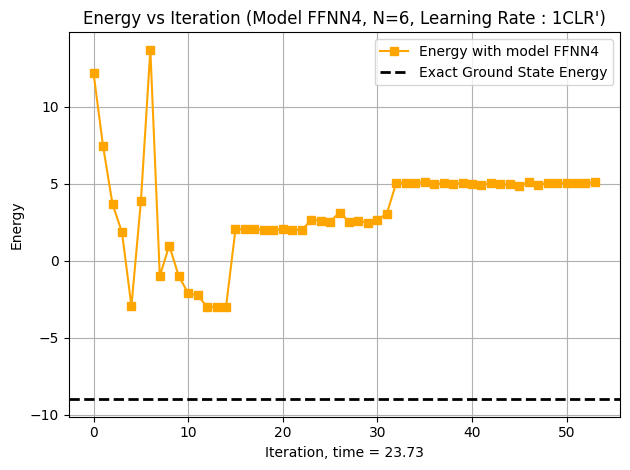

<Figure size 640x480 with 0 Axes>

========== Restart lần 5 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

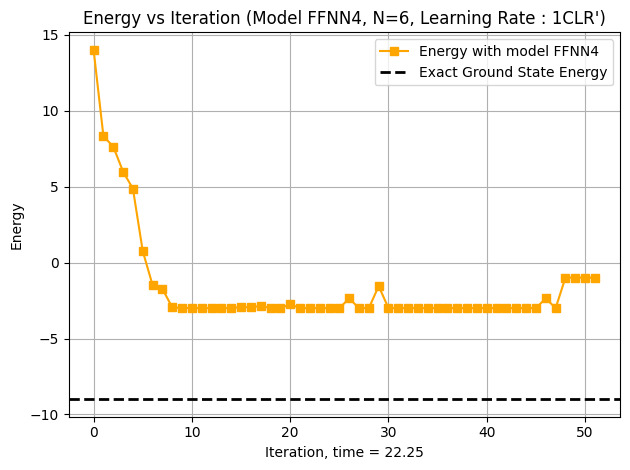

<Figure size 640x480 with 0 Axes>

In [ ]:
chay_model_CGraph(6, "1CLR", restart_times= 5)

========== Restart lần 1 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

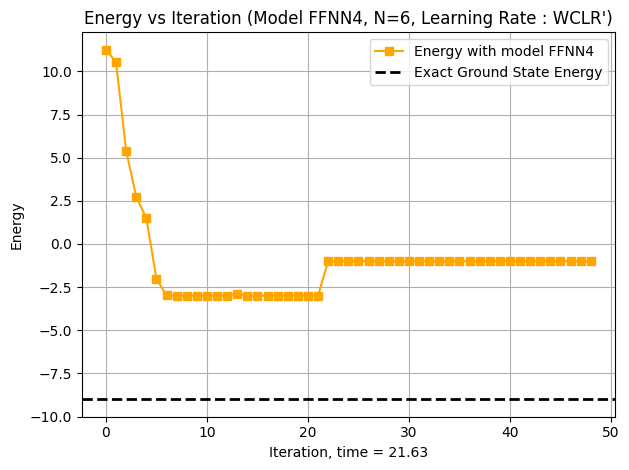

<Figure size 640x480 with 0 Axes>

========== Restart lần 2 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

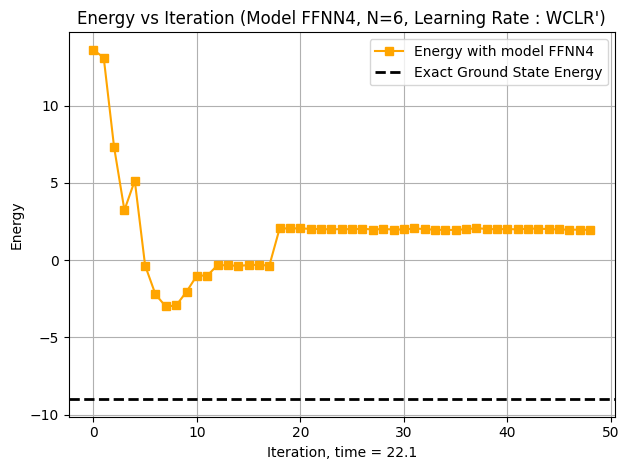

<Figure size 640x480 with 0 Axes>

========== Restart lần 3 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

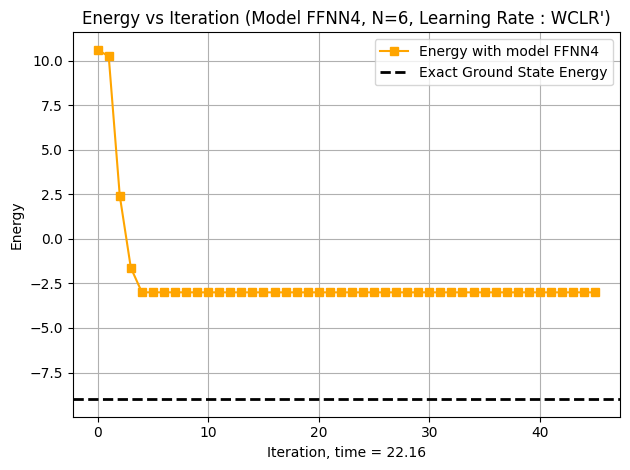

<Figure size 640x480 with 0 Axes>

========== Restart lần 4 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

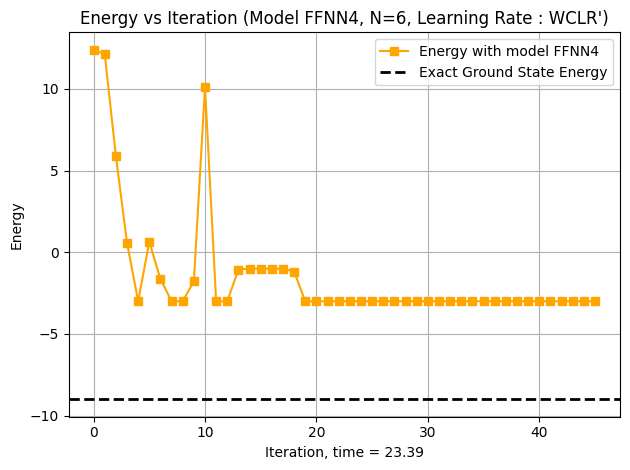

<Figure size 640x480 with 0 Axes>

========== Restart lần 5 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

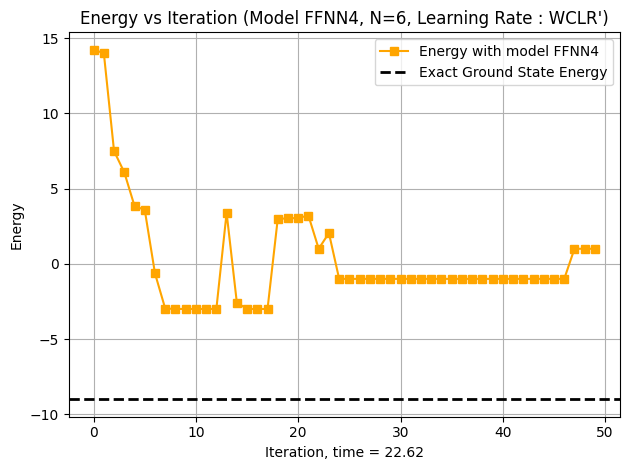

<Figure size 640x480 with 0 Axes>

In [ ]:
chay_model_CGraph(6, "WCLR", restart_times= 5)

Việc tiếp theo mà mình được đề xuất để có thể đạt được kết quả hội tụ như mong muốn là chuẩn hóa dữ liệu, và ở đây là sử dụng chuẩn hóa lớp để tối ưu cho optimizer SGD

In [ ]:
class ffnn4(nnx.Module):
    def __init__(self, N: int, *, rngs: nnx.Rngs):
        self.linear1 = nnx.Linear(in_features=N, out_features=128, dtype=jnp.float32, rngs=rngs)
        self.norm1 = nnx.LayerNorm(128, rngs=rngs)
        self.linear2 = nnx.Linear(in_features=128, out_features=64, dtype=jnp.float32, rngs=rngs)
        self.norm2 = nnx.LayerNorm(64, rngs=rngs)
        self.linear3 = nnx.Linear(in_features=64, out_features=1, dtype=jnp.float32, rngs=rngs)

    def __call__(self, x):
        x = jax.nn.relu(self.norm1(self.linear1(x)))
        x = jax.nn.relu(self.norm2(self.linear2(x)))
        return jnp.squeeze(self.linear3(x), axis=-1)

In [ ]:
#Chúng ta sẽ tiếp tục công việc như ở trên, nhưng model sẽ là ffnn4 với layer normalization và dùng optimizer SGD
def clr_schedule(step, base_lr=0.1, max_lr=5, step_size=20):
    cycle = jnp.floor(1 + step / (2 * step_size))
    x = jnp.abs(step / step_size - 2 * cycle + 1)
    scale = jnp.maximum(0, (1 - x))
    return base_lr + (max_lr - base_lr) * scale
def one_cycle_lr(step = 20, total_steps = 200, base_lr=0.1, max_lr=5, pct_up=0.3):
    up_steps = int(total_steps * pct_up)
    down_steps = total_steps - up_steps

    def lr_up(s):
        return base_lr + (max_lr - base_lr) * (s / up_steps)

    def lr_down(s):
        return max_lr - (max_lr - base_lr * 1e-2) * (s / down_steps)

    return jax.lax.cond(
        step < up_steps,
        lambda s: lr_up(s),
        lambda s: lr_down(s - up_steps),
        step
    )
def warmup_cosine_lr(step, base_lr=5, min_lr=0.01, warmup_steps=20, total_steps=200):
    step = jnp.minimum(step, total_steps)

    def warmup():
        return base_lr * step / warmup_steps

    def cosine_decay():
        decay_steps = total_steps - warmup_steps
        progress = (step - warmup_steps) / decay_steps
        cosine = 0.5 * (1 + jnp.cos(jnp.pi * progress))
        return min_lr + (base_lr - min_lr) * cosine

    return jnp.where(step < warmup_steps, warmup(), cosine_decay())

def chay_model_CGraph(N, LR, restart_times):
  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = g.n_nodes)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)
  for restart_id in range(restart_times):
    print(f"========== Restart lần {restart_id + 1} ==========")
    callback = EarlyStopping(min_delta = 5e-3, patience = 40)

    run_model = ffnn4(N = hi.size, rngs = nnx.Rngs(restart_id + 1))

    sa =  nk.sampler.MetropolisExchange(hi, graph = g)
    vs = nk.vqs.MCState(sa, run_model, n_samples = 1008)

    if LR == 'CLR':
      opt = nk.optimizer.Sgd(learning_rate=clr_schedule)
    if LR == '1CLR':
      opt = nk.optimizer.Sgd(learning_rate=lambda step: one_cycle_lr(step))
    if LR == 'WCLR':
      opt = nk.optimizer.Sgd(learning_rate=lambda step: warmup_cosine_lr(step))

    sr = nk.optimizer.SR(diag_shift = 0.1, holomorphic = False)
    gs = nk.VMC(hamiltonian = ha, optimizer = opt, preconditioner = sr, variational_state = vs)

    start = time.time()
    gs.run(out = "res", n_iter = 200, callback = callback) #
    end = time.time()

    runtime = round(end - start, 2)

    evals = nk.exact.lanczos_ed(ha, compute_eigenvectors = False)
    exact_gs_energy = evals[0]

    data = json.load(open("res.log"))

    iters_FF = data['Energy']['iters']
    energy_FF = data['Energy']['Mean']

    plt.figure()

    plt.plot(iters_FF, energy_FF, color = 'orange', marker = 's', label = f'Energy with model FFNN4, Learning Rate: {LR}')
    plt.xlabel(f'Iteration, time = {runtime}')
    plt.axhline(y = exact_gs_energy, color = 'black', linestyle= '--', linewidth = 2, label= 'Exact Ground State Energy')
    plt.ylabel('Energy')
    plt.title(f"Energy vs Iteration (Model FFNN4, N={N}, Learning Rate : {LR}')")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.figure()
    plt.show()

  return

========== Restart lần 1 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

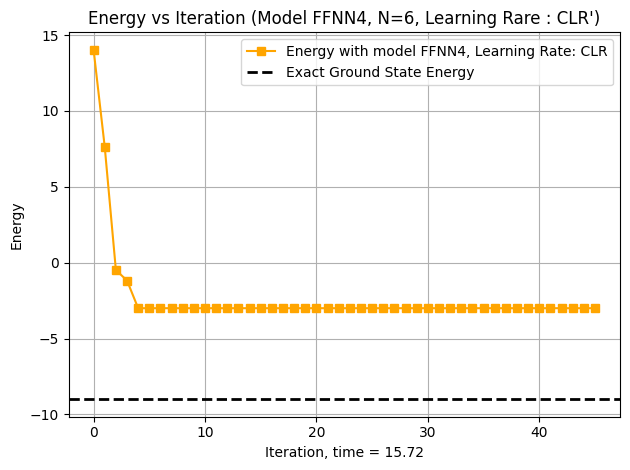

<Figure size 640x480 with 0 Axes>

========== Restart lần 2 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

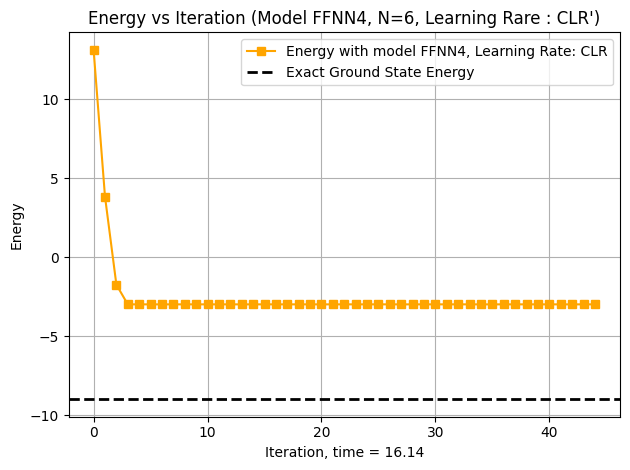

<Figure size 640x480 with 0 Axes>

========== Restart lần 3 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

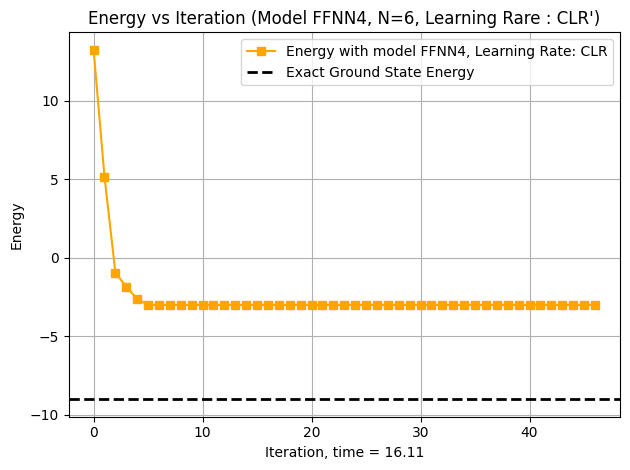

<Figure size 640x480 with 0 Axes>

========== Restart lần 4 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

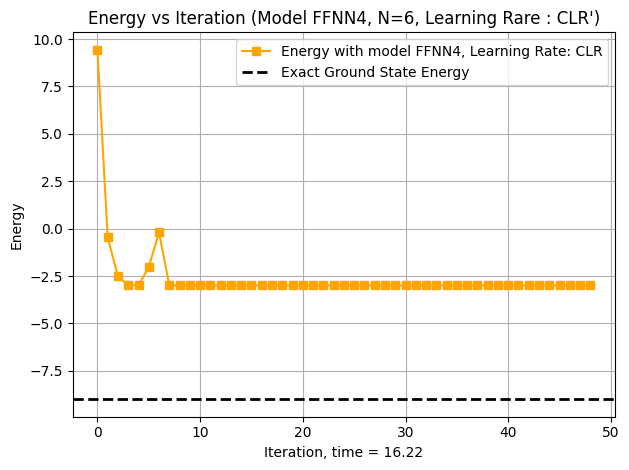

<Figure size 640x480 with 0 Axes>

========== Restart lần 5 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

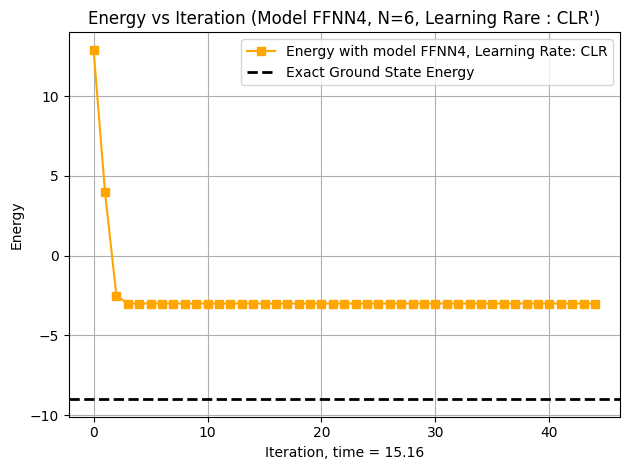

<Figure size 640x480 with 0 Axes>

In [ ]:
chay_model_CGraph(6, "CLR", restart_times= 5)

========== Restart lần 1 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

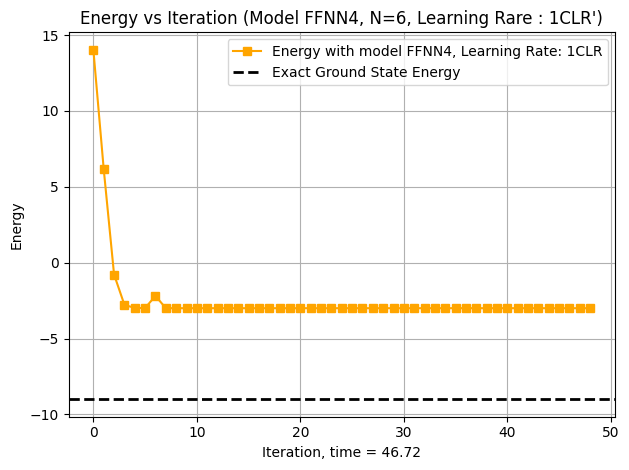

<Figure size 640x480 with 0 Axes>

========== Restart lần 2 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

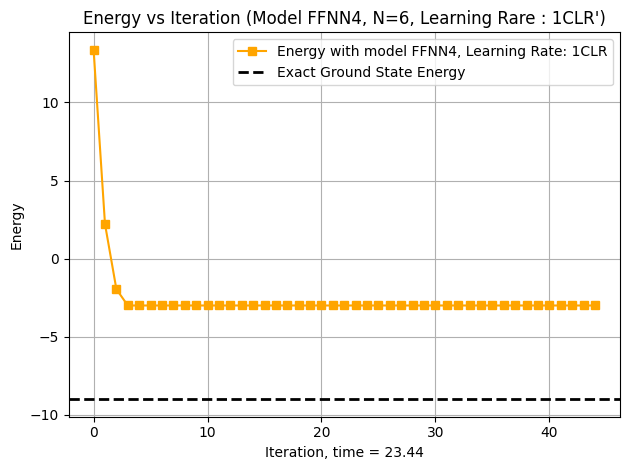

<Figure size 640x480 with 0 Axes>

========== Restart lần 3 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

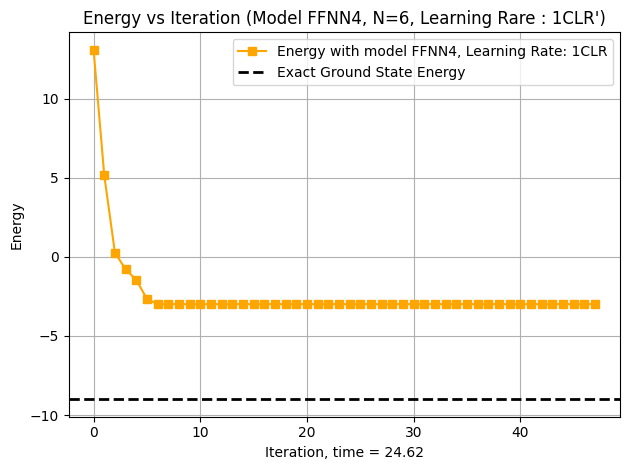

<Figure size 640x480 with 0 Axes>

========== Restart lần 4 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

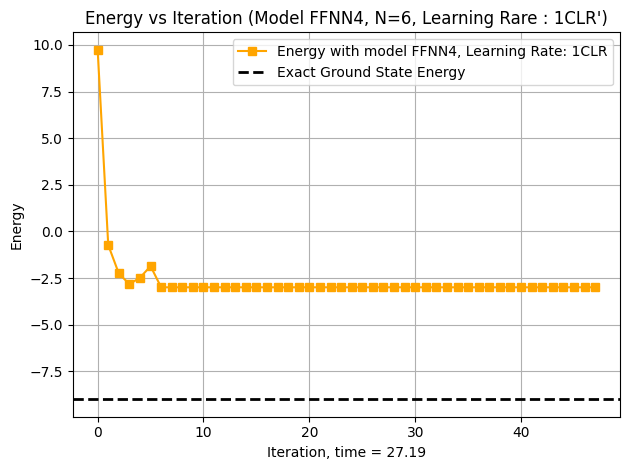

<Figure size 640x480 with 0 Axes>

========== Restart lần 5 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

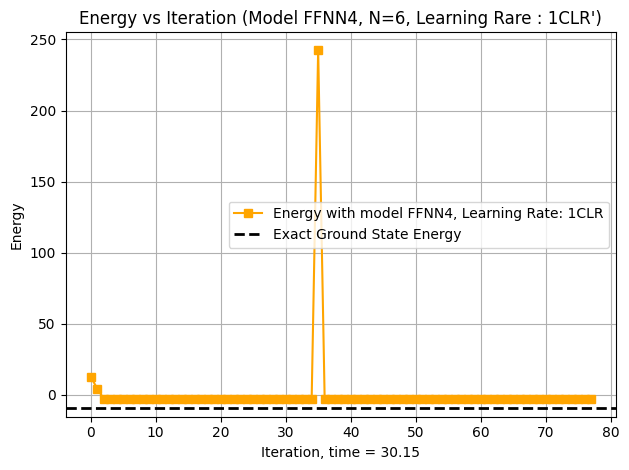

<Figure size 640x480 with 0 Axes>

In [ ]:
chay_model_CGraph(6, "1CLR", restart_times= 5)

========== Restart lần 1 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

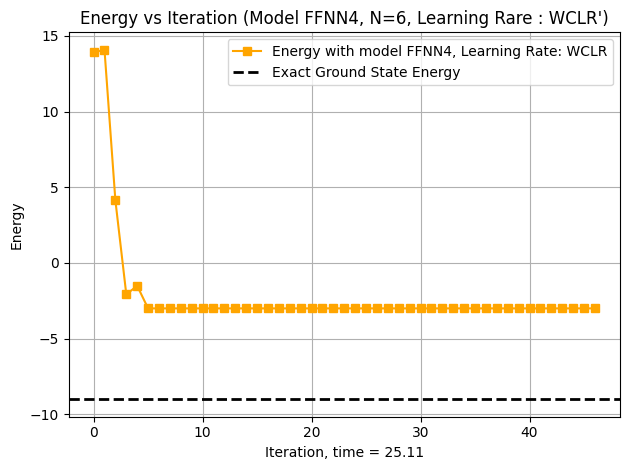

<Figure size 640x480 with 0 Axes>

========== Restart lần 2 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

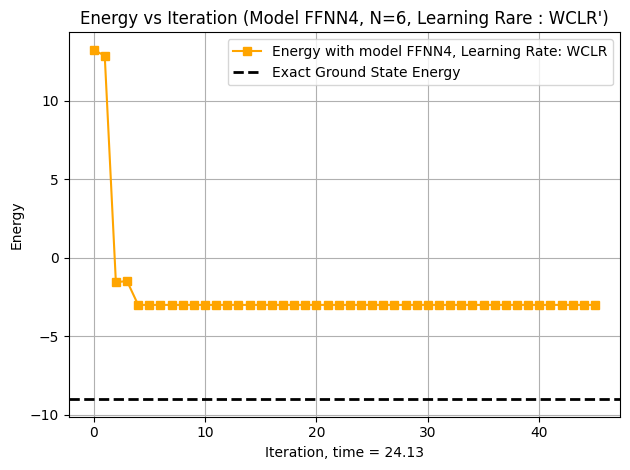

<Figure size 640x480 with 0 Axes>

========== Restart lần 3 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

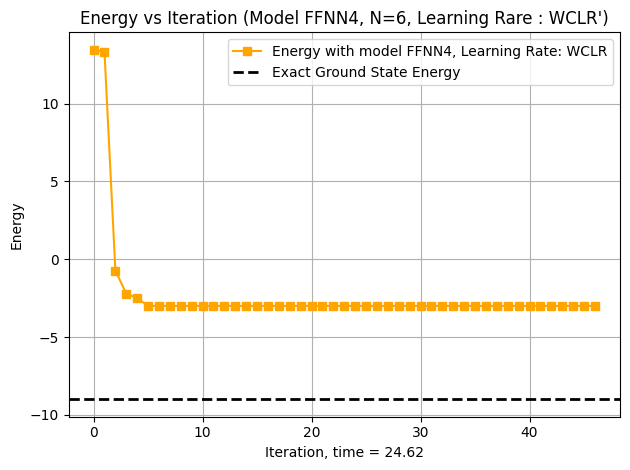

<Figure size 640x480 with 0 Axes>

========== Restart lần 4 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

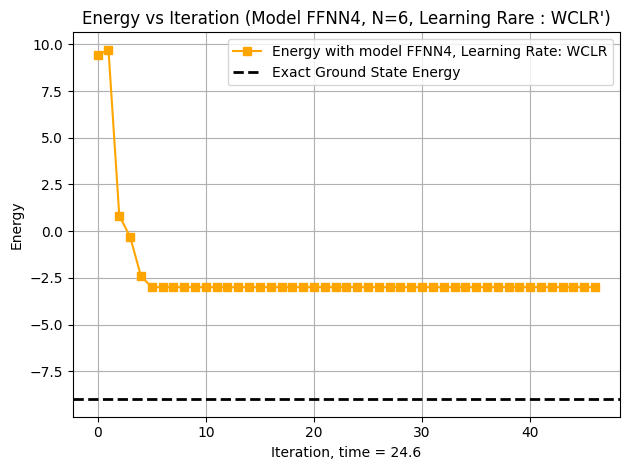

<Figure size 640x480 with 0 Axes>

========== Restart lần 5 ==========


  0%|          | 0/200 [00:00<?, ?it/s]

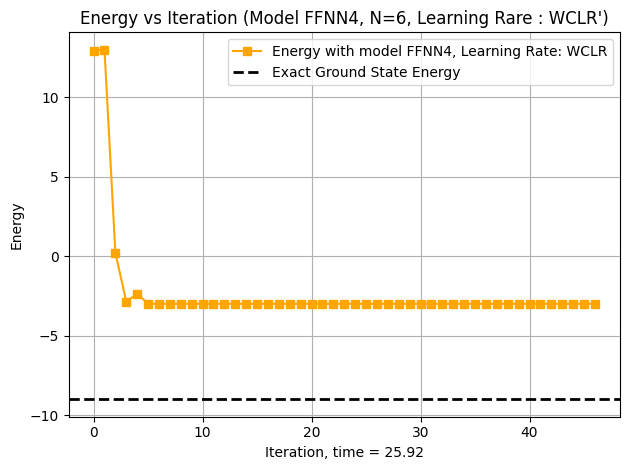

<Figure size 640x480 with 0 Axes>

In [ ]:
chay_model_CGraph(6, "WCLR", restart_times= 5)

Người viết notebook này đã thử mày mò đủ cách để hai giá trị năng lượng (Neural Network và Exact Diagonalization) của Complete Graph có thể hội tụ lại với nhau nhưng có lẽ là chưa đủ =))) Tui xin tạm dừng cuộc chơi tại đây và sẽ trở lại khi đã có nhiều kiến thức về Quantum Computing và AI hơn, cảm ơn vì đã đọc đến dòng này <3

P/s: Cơ sở để thực hiện các thử nghiệm trên là vì muốn xem model lớn hơn có thể trả về kết quả như mong đợi không, việc điều chỉnh Learning Rate liệu có thể "nhảy" qua điểm cực tiểu cực bộ hay không và cũng còn việc là tạo số ngẫu nhiên mà bắt đầu là một số âm thật nhỏ, để từ đó điểm cực tiểu đầu tiên mà đường Neural Network hội tụ chính xác là điểm cực tiểu toàn cục

Update 9/8/2025: Nếu như đã thế, sao ta không thử kiểm tra xem vì lý do gì mà nó chỉ hội tụ về đúng một đường năng lượng, và đó là giá trị energy = - 3 với N = 6 ? Phải chăng có chỉnh learning rate bao nhiêu cũng không thể cho ra kết quả, đó là vì đây đã chính xác là global minimum rồi và cách tính toán của chúng ta mới thực sự sai ? Đoạn code sau đây sẽ in ra tẩt cả các giá trị riêng của toán tử Hamiltonian tương ứng với Complete Graph có N = 6.

In [ ]:
# Đáp án
def cal_all_CGraph(N):

  edges = [(i, j) for i in range (N) for j in range (i + 1, N)]
  g = nk.graph.Graph(edges=edges)
  hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = N)
  ha = nk.operator.Heisenberg(hilbert = hi, graph = g)

  evals = nk.exact.full_ed(ha, compute_eigenvectors = False)

  return evals

In [ ]:
print(cal_all_CGraph(6))

[-9. -9. -9. -9. -9. -5. -5. -5. -5. -5. -5. -5. -5. -5.  3.  3.  3.  3.
  3. 15.]


Có thể thấy không hề có giá trị riêng có giá trị là -3, vậy ta có thể kết luận là chúng ta không phải bị kẹt ở local minimum, mà là đang có sai sót ở tính toán mà sau này sẽ được chỉnh sửa lại để có thể tính toán chính xác, đưa đường Neural Network hội tụ về đúng nơi